<a href="https://colab.research.google.com/github/ruslanraupoff/mai-416854/blob/master/mid_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mnist_012.csv')

Y = df.loc[:, '0']
X = df.drop(['0'], axis=1)

print(df.shape)
df[:-5]

(3147, 785)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3138,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3139,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3140,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.iloc[:, 99:300].head()

,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,255,150,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,253,253,253,218,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,117,247,253,198,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,247,253,231,63,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,254,109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,202,223,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,254,216,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,150,253,202,31,0,0,0,0,0,0,0,0,0,...,0,0,182,255,253,253,253,253,234,222,253,253,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,221,253,251,251,251,147,77,62,128,251
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,53,254,254,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,254,254,180,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,3,42,118,193,118,118,61,0,0,0,0,0,0,0,...,0,63,254,158,0,0,0,0,0,0,0,0,0,221,254,157,0,0,0,0,0,0,0,0,0,0,0,0,0,194,254,103,0,0,0,0,0,0,0,0


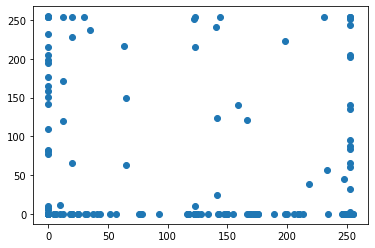

In [ ]:
_ = plt.scatter(X.loc[0, :], X.loc[1, :])

In [ ]:
pca = PCA()

df_pca = pca.fit_transform(X=X)

df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.round(2).head()

(3147, 784)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-134.27,107.74,-544.92,313.08,-500.13,163.35,-223.05,-460.86,1016.40,206.77,491.66,26.38,475.06,-586.81,-212.62,130.30,-142.28,135.03,33.64,-9.19,-82.92,-162.51,139.57,-87.99,76.97,21.82,208.86,-28.25,-280.18,-128.39,-165.00,-149.95,-162.30,-89.39,124.01,281.61,96.67,-102.44,-133.79,-7.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
1,-970.42,-371.82,114.48,-339.01,-53.98,-106.12,19.83,-443.88,-220.42,69.63,-141.34,72.42,89.08,-116.90,-40.08,29.77,105.96,-67.27,-218.66,69.77,2.27,89.43,-108.38,-10.39,-99.69,-91.17,37.94,-41.75,-20.65,116.86,186.42,-47.96,56.63,42.16,-23.05,-75.36,87.34,-67.99,-22.13,47.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,1267.53,-263.23,-35.69,612.76,-734.47,267.74,363.05,-130.85,-160.31,-353.75,-316.92,-125.14,-133.72,80.05,16.87,-157.65,-234.52,57.10,-198.97,-296.49,-193.29,-91.81,-3.74,-49.12,-147.65,-98.96,-98.50,-5.60,62.70,-163.71,7.02,88.61,-159.14,-58.18,-98.59,-85.81,-14.07,64.47,125.77,42.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
3,-1066.12,-239.33,137.99,-424.37,-174.55,209.85,57.16,-316.86,-325.03,148.86,-51.87,42.10,-56.41,22.17,-60.44,24.64,108.28,-107.71,-159.33,134.35,131.50,38.26,-126.87,-1.04,20.08,-120.55,41.79,55.17,9.22,158.18,199.40,24.06,-28.66,9.80,-51.94,-44.95,50.79,-41.41,7.60,37.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
4,1037.18,-427.39,-700.74,-566.28,134.67,-584.41,-546.83,-70.67,52.58,306.40,-170.10,162.76,-123.09,279.96,41.96,238.51,-279.91,57.05,-120.73,225.49,-179.04,-134.83,-315.96,-61.74,19.72,-103.51,-144.81,-9.63,-15.06,-97.12,-105.78,45.64,130.31,-104.69,150.17,154.45,-120.55,-72.78,190.21,-116.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0


In [ ]:
df_pca_loadings = pd.DataFrame(pca.components_)
#df_pca_loadings.round().head()
df_pca_loadings.iloc[:, 99:300].head()

,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.002954,0.003753,0.003076,0.002355,0.001344,0.000638,0.000306,0.000323,0.000160,0.000035,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,3.300415e-05,0.000041,-0.000033,-0.000288,-0.000894,-0.001166,-0.000567,0.001086,0.002939,0.006420,0.009710,0.010543,0.015770,0.018512,0.015585,0.012526,0.009144,0.004377,0.001887,0.000526,0.000349,0.000103,7.458552e-07,-0.0,...,0.034037,0.057509,0.077492,0.085052,0.073752,0.038675,-0.007562,-0.037319,-0.034709,-0.005769,0.036193,0.072134,0.086454,0.077850,0.053449,0.024759,0.005378,0.000172,-0.0,-0.0,-0.0,-0.0,-0.0,0.000017,0.000547,0.002629,0.011043,0.026826,0.048716,0.072775,0.085233,0.081239,0.059337,0.014625,-0.040007,-0.068659,-0.056509,-0.019560,0.025282,0.066038
1,0.030782,0.024658,0.017667,0.011642,0.006430,0.003064,0.000656,0.000027,-0.000183,-0.000061,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.658087e-05,-0.000015,-0.000023,0.002725,0.007289,0.014248,0.025181,0.039256,0.051713,0.060454,0.061522,0.058359,0.057359,0.056783,0.049856,0.036724,0.023158,0.013413,0.005847,0.001465,0.000171,0.000014,1.748512e-06,-0.0,...,0.003911,-0.004314,-0.016087,-0.028965,-0.048701,-0.082229,-0.104554,-0.069259,0.012443,0.083356,0.108502,0.075569,0.019252,-0.025893,-0.038406,-0.024844,-0.006302,-0.000257,-0.0,-0.0,-0.0,-0.0,-0.0,0.000230,0.000578,0.000331,-0.002880,-0.010245,-0.019646,-0.032360,-0.041279,-0.044369,-0.052499,-0.081915,-0.096004,-0.051464,0.033584,0.102714,0.119228,0.081600
2,0.008586,0.013367,0.013512,0.010878,0.007531,0.004874,0.002029,0.001346,0.000664,0.000150,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.009072e-04,0.000125,-0.000286,-0.002722,-0.006988,-0.012505,-0.023437,-0.037443,-0.052228,-0.067116,-0.075596,-0.067036,-0.035623,0.005385,0.044616,0.060359,0.055236,0.038847,0.021693,0.009483,0.003224,0.000966,2.006052e-05,-0.0,...,-0.083241,-0.086113,-0.054633,-0.002270,0.043467,0.062075,0.063937,0.051380,0.021955,-0.003885,-0.013669,0.003389,0.029999,0.043713,0.042308,0.023817,0.005075,0.000285,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000373,-0.002285,-0.009583,-0.032614,-0.061409,-0.072440,-0.053837,-0.007267,0.045022,0.071683,0.071842,0.056876,0.034830,0.010630,-0.010446,-0.014962,0.000724
3,0.011401,0.008907,0.005603,0.002359,0.001101,0.000943,0.000676,0.000512,0.000124,0.000015,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-8.863490e-07,0.000003,0.000261,0.002419,0.005946,0.010683,0.016431,0.023018,0.032502,0.044113,0.057678,0.065803,0.050143,0.015735,-0.016079,-0.032853,-0.032039,-0.023754,-0.011680,-0.005683,-0.001355,-0.000371,1.711227e-06,-0.0,...,-0.028469,-0.030911,-0.015511,0.011456,0.047987,0.095685,0.097899,0.021046,-0.072149,-0.088668,-0.050749,-0.016058,-0.017055,-0.036213,-0.037724,-0.023982,-0.006248,-0.000202,-0.0,-0.0,-0.0,-0.0,-0.0,0.000391,0.000067,-0.002111,-0.012974,-0.030830,-0.041990,-0.033980,-0.011491,0.015550,0.050217,0.093095,0.074029,-0.012412,-0.090194,-0.078063,-0.014867,0.026968
4,0.012657,0.013606,0.013989,0.012999,0.008041,0.003704,0.000850,0.000528,0.000191,0.000061,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-4.659034e-05,-0.000054,-0.000204,-0.000154,-0.000641,-0.000820,-0.001132,-0.001482,0.000574,-0.000025,-0.007183,-0.017538,-0.030265,-0.034162,-0.025162,-0.006766,0.004960,0.009030,0.008027,0.003218,0.000866,-0.000096,-2.039303e-06,-0.0,...,0.058028,0.043471,0.005474,-0.026077,-0.028041,-0.012234,-0.010211,-0.040346,-0.074992,-0.081148,-0.067402,-0.033390,0.017146,0.064727,0.068128,0.037050,0.007093,0.000110,-0.0,-0.0,-0.0,-0.0,-0.0,0.000008,0.001464,0.009127,0.030963,0.056196,0.055618,0.017473,-0.031838,-0.056335,-0.048014,-0.028563,-0.026108,-0.048715,-0.070067,-0.065494,-0.052512,-0.040993


In [ ]:
X_mean = X - X.mean()
X_mean.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.dot(df_pca_loadings.loc[0,:], X_mean.loc[0,:])

-134.27241070066748

In [ ]:
pca.explained_variance_ratio_.round(2)[:10]

array([0.22, 0.1 , 0.06, 0.06, 0.04, 0.04, 0.03, 0.03, 0.02, 0.02])

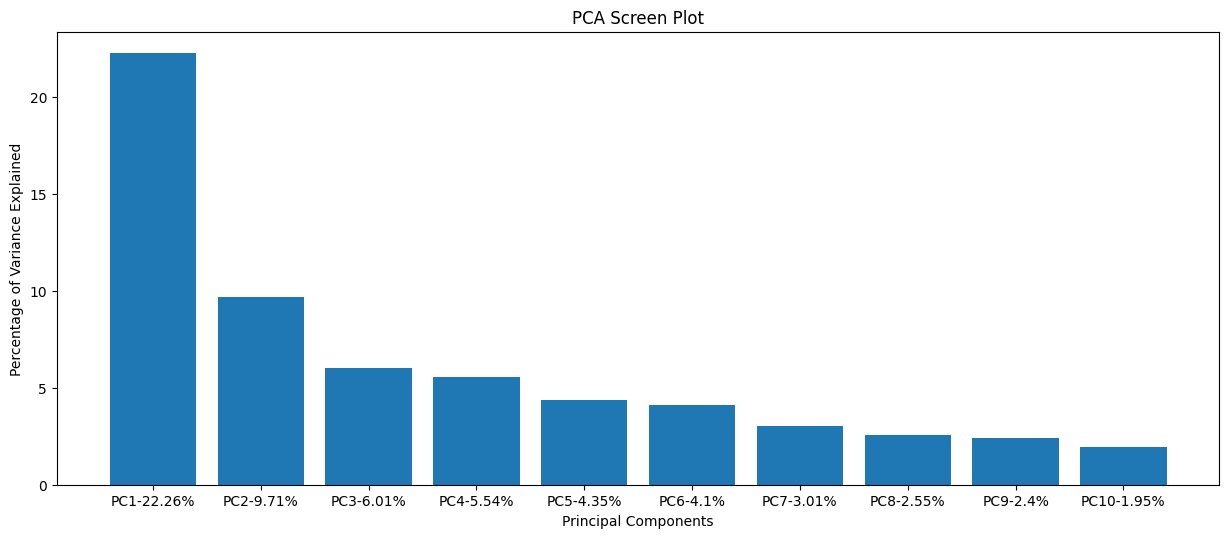

In [ ]:
per_vars = np.round(pca.explained_variance_ratio_[:10] * 100, 2)
columns = ['PC' + str(i+1) + '-' + str(per_vars[i]) + '%' for i in range(10)]
fig, axes = plt.subplots(1, 1, figsize=(15, 6), dpi=100)
plt.bar(x=range(10), height=per_vars, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Components')
plt.title('PCA Screen Plot')
plt.show()

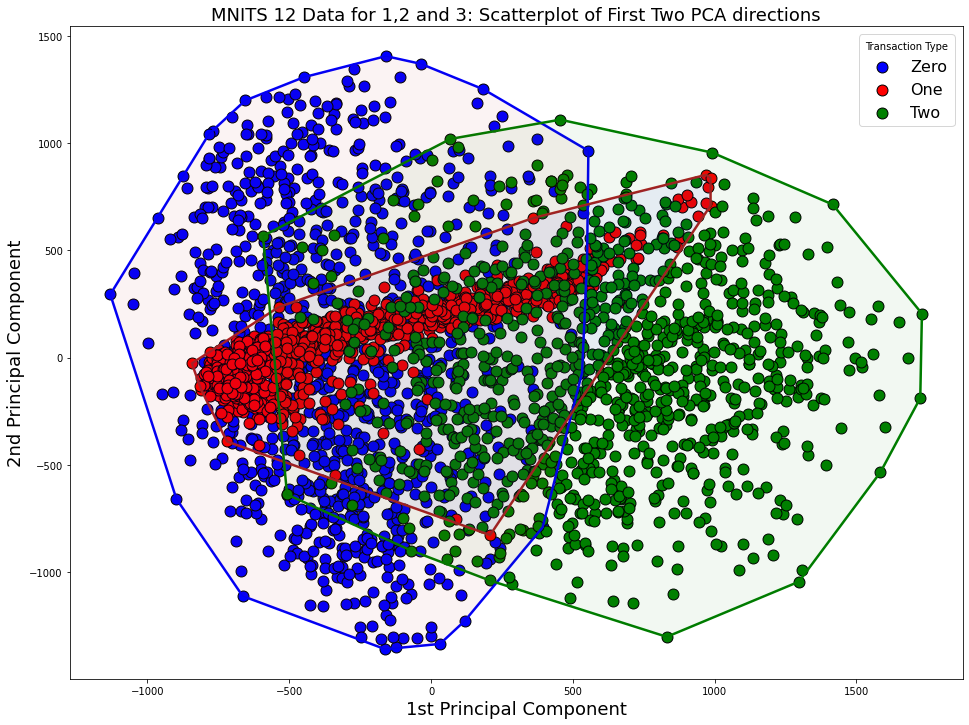

In [ ]:
from scipy.spatial import ConvexHull

def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

fig, ax = plt.subplots(1, 1, figsize=(16,12))

row0 = Y == 0
row1 = Y == 1
row2 = Y == 2

ax.scatter(df_pca.loc[row0.tolist(), 1], df_pca.loc[row0.tolist(), 2], c='blue', edgecolor='k', s=120,label='Zero')
ax.scatter(df_pca.loc[row1.tolist(), 1], df_pca.loc[row1.tolist(), 2], c='red', edgecolor='k', s=120,label='One')
ax.scatter(df_pca.loc[row2.tolist(), 1], df_pca.loc[row2.tolist(), 2], c='green', edgecolor='k', s=120,label='Two')

encircle(df_pca.loc[row0.tolist(), 1], df_pca.loc[row0.tolist(), 2], ec='blue', fc="none", linewidth=2.5)
encircle(df_pca.loc[row1.tolist(), 1], df_pca.loc[row1.tolist(), 2], ec='firebrick', fc="none", linewidth=2.5)
encircle(df_pca.loc[row2.tolist(), 1], df_pca.loc[row2.tolist(), 2], ec='green', fc="none", linewidth=2.5)

encircle(df_pca.loc[row0.tolist(), 1], df_pca.loc[row0.tolist(), 2], ec='k', fc="firebrick", alpha=0.05)
encircle(df_pca.loc[row1.tolist(), 1], df_pca.loc[row1.tolist(), 2], ec='k', fc="blue", alpha=0.05)
encircle(df_pca.loc[row2.tolist(), 1], df_pca.loc[row2.tolist(), 2], ec='k', fc="green", alpha=0.05)

ax.set_title('MNITS 12 Data for 1,2 and 3: Scatterplot of First Two PCA directions', fontsize=18)
ax.set_xlabel('1st Principal Component', fontsize=18)
ax.set_ylabel('2nd Principal Component', fontsize=18)
ax.legend(loc='best', title='Transaction Type', fontsize=16)
plt.show()

In [ ]:
df_inv = pca.inverse_transform(df_pca)
df_org = pd.DataFrame(df_inv).round()
df_org.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_std = X_mean
X_std

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012075,-0.074992,-0.050207,-0.074039,-0.045758,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_cov = X_std.cov()
print(df_cov.shape)
df_cov.head()

(784, 784)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
eignvalues, eignvectors = np.linalg.eig(df_cov)
print(eignvalues[:10])
print(eignvectors[:10])

[764074.70509694+0.j 333409.88084323+0.j 206248.30545139+0.j
 190073.11430869+0.j 149373.67054257+0.j 140893.79592355+0.j
 103478.87643359+0.j  87549.48702637+0.j  82347.51266608+0.j
  66776.33611636+0.j]
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [ ]:
X_pca = np.dot(X_std, eignvectors)
df_pca_calc = pd.DataFrame(X_pca)
df_pca_calc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,134.272411+0.000000j,-107.740102+0.000000j,544.923409+0.000000j,-313.075995+0.000000j,-500.134982+0.000000j,163.354256+0.000000j,-223.046212+0.000000j,460.862253+0.000000j,-1016.398109+0.000000j,-206.766560+0.000000j,-491.662638+0.000000j,-26.376007+0.000000j,-475.057622+0.000000j,-586.809863+0.000000j,-212.622212+0.000000j,-130.297889+0.000000j,142.278444+0.000000j,135.029931+0.000000j,33.643003+0.000000j,-9.194938+0.000000j,82.922710+0.000000j,162.514914+0.000000j,-139.570371+0.000000j,87.986462+0.000000j,-76.970878+0.000000j,-21.824123+0.000000j,-208.855559+0.000000j,28.252003+0.000000j,280.181207+0.000000j,-128.385314+0.000000j,-165.000657+0.000000j,-149.950567+0.000000j,162.304944+0.000000j,89.392726+0.000000j,124.013490+0.000000j,281.610563+0.000000j,-96.673928+0.000000j,-102.441490+0.000000j,133.785199+0.000000j,-7.601007+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
1,970.415120+0.000000j,371.815822+0.000000j,-114.480754+0.000000j,339.005162+0.000000j,-53.982530+0.000000j,-106.119979+0.000000j,19.826584+0.000000j,443.883798+0.000000j,220.422325+0.000000j,-69.631540+0.000000j,141.336276+0.000000j,-72.415050+0.000000j,-89.075448+0.000000j,-116.900031+0.000000j,-40.079566+0.000000j,-29.770988+0.000000j,-105.960559+0.000000j,-67.267045+0.000000j,-218.655610+0.000000j,69.774808+0.000000j,-2.270602+0.000000j,-89.431133+0.000000j,108.383535+0.000000j,10.387748+0.000000j,99.685563+0.000000j,91.165364+0.000000j,-37.935482+0.000000j,41.748924+0.000000j,20.647970+0.000000j,116.860062+0.000000j,186.422141+0.000000j,-47.962832+0.000000j,-56.630129+0.000000j,-42.162463+0.000000j,-23.051763+0.000000j,-75.361095+0.000000j,-87.340752+0.000000j,-67.994483+0.000000j,22.128388+0.000000j,47.302410+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
2,-1267.529703+0.000000j,263.230207+0.000000j,35.686933+0.000000j,-612.758736+0.000000j,-734.466507+0.000000j,267.736221+0.000000j,363.049391+0.000000j,130.846209+0.000000j,160.311147+0.000000j,353.753834+0.000000j,316.922194+0.000000j,125.144511+0.000000j,133.715372+0.000000j,80.050393+0.000000j,16.868405+0.000000j,157.649139+0.000000j,234.518837+0.000000j,57.097376+0.000000j,-198.970961+0.000000j,-296.490366+0.000000j,193.287551+0.000000j,91.810274+0.000000j,3.735553+0.000000j,49.120818+0.000000j,147

In [ ]:
ncoord = np.matmul(eignvectors, X_std.T)
n_cords = np.vstack((ncoord, Y)).T
df_new = pd.DataFrame(data=n_cords[:, :3], columns=["1st pca", "2nd pca", "label"])
df_new.head()

,1st pca,2nd pca,label
0,108.616460+0.000000j,115.167143+0.000000j,130.418176+0.000000j
1,109.616460+0.000000j,-71.832857+0.000000j,-122.581824+0.000000j
2,106.616460+0.000000j,113.167143+0.000000j,130.418176+0.000000j
3,89.616460+0.000000j,-117.832857+0.000000j,-122.581824+0.000000j
4,-144.383540+0.000000j,-137.832857+0.000000j,-76.581824+0.000000j


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


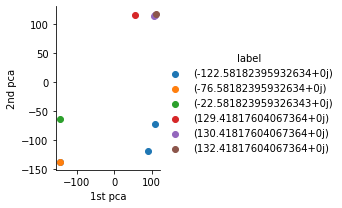

In [ ]:
import seaborn as sns
sns.FacetGrid(df_new[:10], hue='label', height=3).map(plt.scatter, "1st pca", "2nd pca").add_legend()
plt.show()

In [ ]:
cumsum_ = np.cumsum(pca.explained_variance_ratio_)
np.argmax(cumsum_ >= 0.95) + 1

119

In [ ]:
cumsum_[0]

0.22258710170632987

In [ ]:
pca2 = PCA(n_components=3)

principalComponents = pca2.fit_transform(X)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
principalDataframe.head()

,PC1,PC2,PC3
0,-134.272411,107.740116,-544.920135
1,-970.415121,-371.815799,114.482457
2,1267.529703,-263.230335,-35.689732
3,-1066.123553,-239.331637,137.989422
4,1037.176916,-427.394259,-700.742563


In [ ]:
targetDataframe = pd.DataFrame(data=Y.values, columns=['target'])

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,target
0,-134.272411,107.740116,-544.920135,2
1,-970.415121,-371.815799,114.482457,1
2,1267.529703,-263.230335,-35.689732,0
3,-1066.123553,-239.331637,137.989422,1
4,1037.176916,-427.394259,-700.742563,0


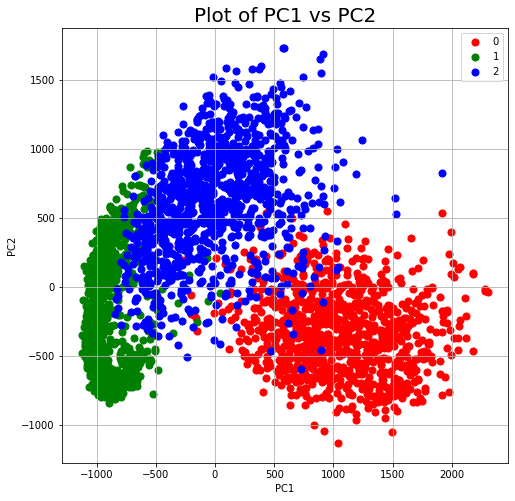

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = [0, 1, 2]

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()


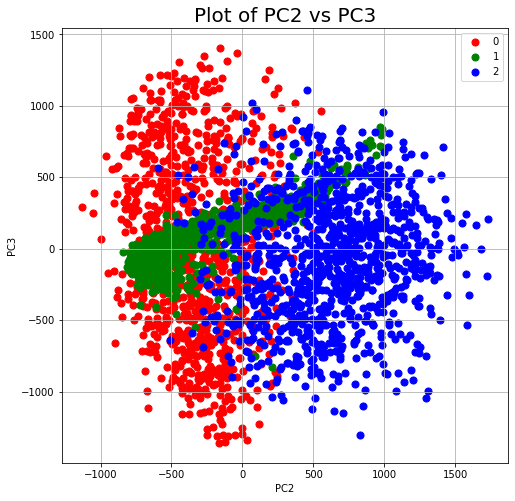

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

ax.set_title('Plot of PC2 vs PC3', fontsize = 20)

targets = [0, 1, 2]

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC2']
               , newDataframe.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()


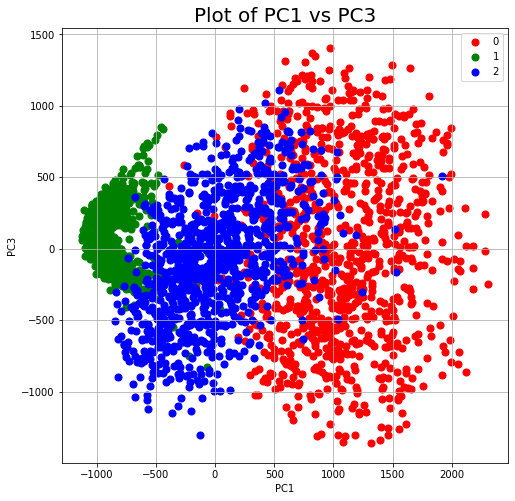

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')

ax.set_title('Plot of PC1 vs PC3', fontsize = 20)

targets = [0, 1, 2]

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()
